In [2]:
import numpy as np
import scipy.io.wavfile
import matplotlib.pyplot as plt
from scipy.signal import *
from math import sqrt
import sounddevice as sd


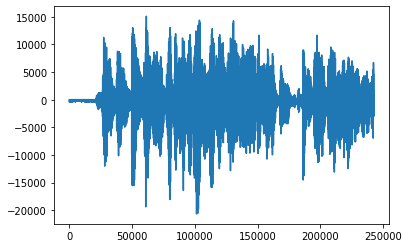

In [26]:
plt.plot(scipy.io.wavfile.read('eco1.wav')[1])

In [39]:
frame_rate = scipy.io.wavfile.read('eco1.wav')[0]
y = scipy.io.wavfile.read('eco1.wav')[1].astype(np.float64)
y_max = max(y)
y /= y_max

In [19]:
scipy.io.wavfile.write('prova1.wav', frame_rate, scipy.io.wavfile.read('eco1.wav')[1])

(11025, 10791.460011842502, 5127.04108622046)

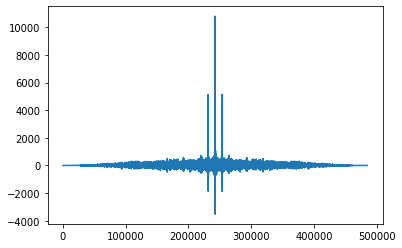

In [40]:
Ryy = convolve(y, y[::-1])
Ryy = list(Ryy)
peaks = []
for i in range(1, len(Ryy)-1):
    prev = Ryy[i-1]
    curr = Ryy[i]
    nxt = Ryy[i+1]
    if prev < curr and curr > nxt:
        peaks.append([i, curr])
peaks.sort(reverse=True, key=lambda x : x[1] )
Ryy0 = peaks[0][1].item()
pos_Ryy0 = peaks[0][0]
RyyN = peaks[1][1].item()
pos_RyyN = peaks[1][0]
N = abs(pos_Ryy0 - pos_RyyN)

plt.plot(Ryy)
N, Ryy0, RyyN

In [41]:
a1 = (Ryy0 + sqrt(Ryy0**2 - 4*RyyN**2))/(2*RyyN)
a2 = (Ryy0 - sqrt(Ryy0**2 - 4*RyyN**2))/(2*RyyN)
a1, a2

(1.3803679451057127, 0.724444524770109)

([<matplotlib.lines.Line2D at 0x7f99e97ff0d0>], 0.7244445247701092)

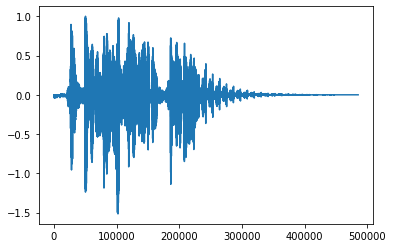

In [45]:
b = a2
h2 = np.zeros(len(y))
for i in range(len(y)):
    if i%N == 0:
        h2[i] = (-b)**(i//N)
        
# OJO! Audio s'escolta MOLT FORT!    

z = convolve(y,h2, mode='full')
maxim = max(z)
z /= maxim
scipy.io.wavfile.write('sin_eco1_def.wav',frame_rate, z)
plt.plot(z), b

In [28]:
#no funciona
a = np.zeros(N)
a[0] = 1
a2 = (Ryy0/RyyN - np.sqrt((Ryy0/RyyN)**2-4))/2
a[N-1] = a2
y //= max(y)
z = lfilter([1],a,y, axis=-1, zi=None)
z //= max(z)
scipy.io.wavfile.write('sin_eco1_5.wav',frame_rate, z)